## **Types of Time Series Models and Applications:**

### **1. Statistical Time Series Models:**

**ARIMA (AutoRegressive Integrated Moving Average):**

Application: ARIMA models are widely used for forecasting in various fields such as finance, economics, and weather forecasting. They are suitable for time series data exhibiting trend and seasonality.

**SARIMA (Seasonal ARIMA):**

Application: SARIMA models are an extension of ARIMA that explicitly models seasonality in the data. They are suitable for time series data with strong seasonal patterns, such as retail sales, tourism, and demand forecasting.

**Exponential Smoothing Models:**

Application: Exponential smoothing models, including Simple Exponential Smoothing (SES), Double Exponential Smoothing (Holt-Winters), and Triple Exponential Smoothing, are commonly used for short-term forecasting in business applications like inventory management, sales forecasting, and supply chain optimization.

### **2. Machine Learning Time Series Models:**

**Recurrent Neural Networks (RNNs) with LSTM:**

Application: RNNs with Long Short-Term Memory (LSTM) cells are powerful models for sequence prediction tasks, including time series forecasting, natural language processing, and speech recognition. They are suitable for modeling complex temporal dependencies in data.

**Gradient Boosting Machines (GBMs):**

Application: GBM algorithms such as XGBoost, LightGBM, and CatBoost are effective for time series forecasting tasks, particularly when dealing with large datasets with heterogeneous features. They are widely used in finance for stock price prediction, in energy markets for demand forecasting, and in healthcare for patient outcome prediction.

**Hybrid Models (Statistical + Machine Learning):**

Application: Hybrid models that combine statistical approaches like ARIMA with machine learning techniques such as neural networks or gradient boosting are increasingly popular. These models leverage the strengths of both approaches and are applied in various domains where accurate and robust predictions are required.

In [48]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import statsmodels.graphics.tsaplots as sgt
import warnings

In [49]:
warnings.filterwarnings("ignore")

In [50]:
# Loading the data

data = pd.read_csv("/content/monthly-milk-production-pounds.csv")

In [51]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 2 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Month                                                     169 non-null    object 
 1   Monthly milk production: pounds per cow. Jan 62 ? Dec 75  168 non-null    float64
dtypes: float64(1), object(1)
memory usage: 2.8+ KB


In [52]:
data.columns = ['Month','Milk in pounds per cow']

In [ ]:
data.head()

,Month,Milk in pounds per cow
0,1962-01,589.0
1,1962-02,561.0
2,1962-03,640.0
3,1962-04,656.0
4,1962-05,727.0


In [53]:
data = data[~data['Month'].str.contains('\?')]

In [54]:
data['Month'] = pd.to_datetime(data['Month'])

In [55]:
data.set_index("Month",inplace=True)

In [56]:
data.head()

,Milk in pounds per cow
Month,
1962-01-01,589.0
1962-02-01,561.0
1962-03-01,640.0
1962-04-01,656.0
1962-05-01,727.0


# **AR Model**

Autoregressive (AR) Model:
The Autoregressive (AR) model is a linear regression model that uses past values of the time series itself as predictors for future values.
Application:
AR models are useful for capturing temporal dependencies in the data, such as trends and cyclic patterns. They are commonly used in finance for modeling stock prices, in economics for macroeconomic forecasting, and in meteorology for weather prediction.

This type of analysis is used when there is a correlation between the time series values and their preceding and succeeding values.

**x(t) = c + theta.x(t-1) + epsilon(noise)**

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 168 entries, 1962-01-01 to 1975-12-01
Data columns (total 1 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Milk in pounds per cow  168 non-null    float64
dtypes: float64(1)
memory usage: 2.6 KB


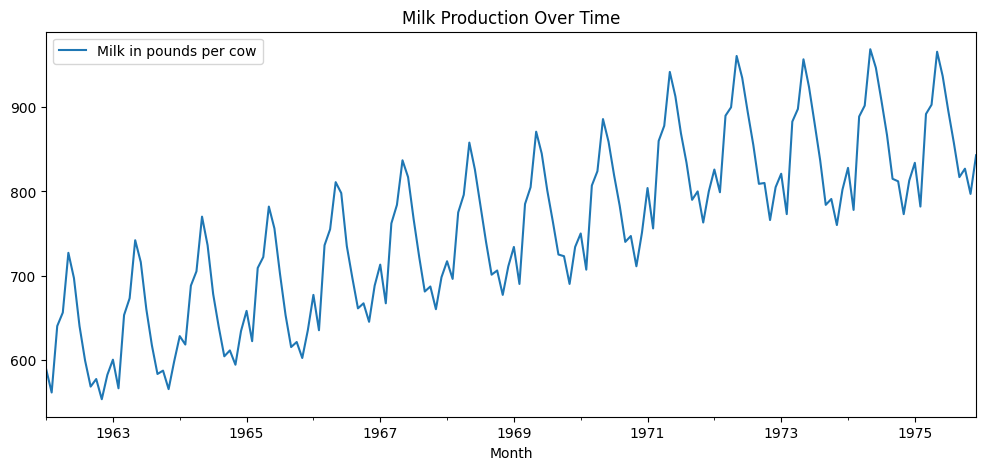

In [57]:
data.plot(figsize=(12,5))
plt.title("Milk Production Over Time")
plt.show()

**Stationarity**

In [58]:
import statsmodels.tsa.stattools as sts

In [59]:
adf_results = sts.adfuller(data)

In [60]:
adf_statistic = adf_results[0]
p_value = adf_results[1]
usedlag = adf_results[2]
nobs = adf_results[3]
critical_values = adf_results[4]
icbest = adf_results[5]

In [61]:
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Number of Lags Used:', usedlag)
print('Number of Observations Used:', nobs)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'\t{key}: {value}')

ADF Statistic: -1.3038115874221308
p-value: 0.6274267086030311
Number of Lags Used: 13
Number of Observations Used: 154
Critical Values:
	1%: -3.473542528196209
	5%: -2.880497674144038
	10%: -2.576878053634677


**Decomposition**

In [62]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [63]:
decomp = seasonal_decompose(data,model='additive')

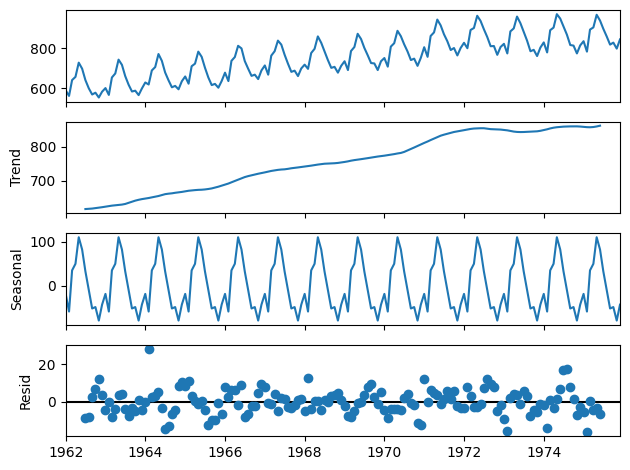

In [64]:
decomp.plot()
plt.show()

In [65]:
mul_decomp = seasonal_decompose(data,model='multiplicative')

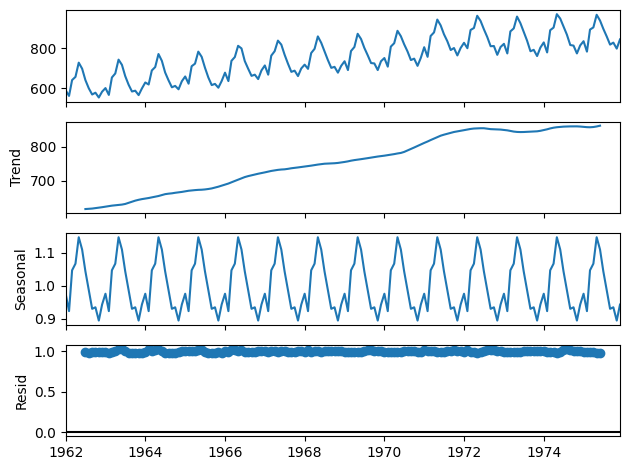

In [66]:
mul_decomp.plot()
plt.show()

**Selecting the number of lags**

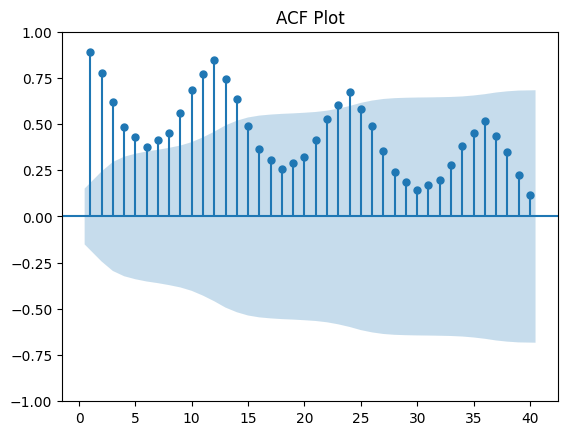

In [67]:
sgt.plot_acf(data,lags=40,zero=False)
plt.title("ACF Plot")
plt.show()

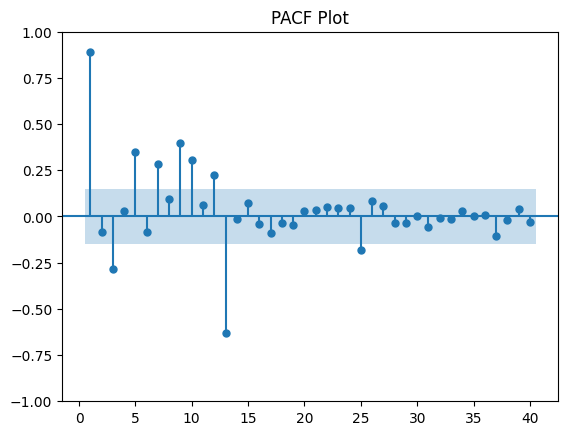

In [68]:
sgt.plot_pacf(data,lags=40,zero=False)
plt.title("PACF Plot")
plt.show()

**Grabbing the PACF Values**

In [69]:
from statsmodels.tsa.stattools import pacf

In [70]:
pacf_values = pacf(data)

# Display the PACF values
print("Partial Autocorrelation Coefficients:")
for lag, pacf_value in enumerate(pacf_values):
    print(f"Lag {lag}: {pacf_value}")


Partial Autocorrelation Coefficients:
Lag 0: 1.0
Lag 1: 0.8969125415752558
Lag 2: -0.08641101505779088
Lag 3: -0.30065407667654365
Lag 4: 0.037043529444169596
Lag 5: 0.38861552019863327
Lag 6: -0.09669471738695985
Lag 7: 0.30386493884570565
Lag 8: 0.10921592979776402
Lag 9: 0.46009995430034156
Lag 10: 0.37723164801243464
Lag 11: 0.1203745963600276
Lag 12: 0.3393043797716418
Lag 13: -0.798018034968917
Lag 14: -0.051046061761973995
Lag 15: 0.10633953407553785
Lag 16: -0.06695208922451475
Lag 17: -0.10974449384248558
Lag 18: -0.10405258286876193
Lag 19: -0.005808252042368287
Lag 20: 0.12201984195920455
Lag 21: 0.11313973466788181
Lag 22: 0.10284679505359885


## **Fitting an AR Model**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA

- Specifying the number of past values we wish to incorporate into the model

In [71]:
model_ar = ARIMA(data,order=(1,0,0))

In [72]:
results_ar = model_ar.fit()

In [73]:
# Extracting results using the summary method

results_ar.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Milk in pounds per cow   No. Observations:                  168
Model:                     ARIMA(1, 0, 0)   Log Likelihood                -875.993
Date:                    Thu, 14 Mar 2024   AIC                           1757.985
Time:                            18:21:30   BIC                           1767.357
Sample:                        01-01-1962   HQIC                          1761.789
                             - 12-01-1975                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        750.7973     37.373     20.089      0.000     677.548     824.046
ar.L1          0.9043      0.039     23.101      0.000       0.828       0.981
sigma2      1959.5740    283.601      6.910      0.000    1403.726    2515.422
===================================================================================
Ljung-Box (L1) (Q):                   0.74   Jarque-Bera (JB):                14.46
Prob(Q):                              0.39   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.67
Prob(H) (two-sided):                  0.73   Kurtosis:                         2.50
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Fitting a more complex model**

In [74]:
results_2 = ARIMA(data,order=(2,0,0)).fit()
results_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Milk in pounds per cow   No. Observations:                  168
Model:                     ARIMA(2, 0, 0)   Log Likelihood                -875.492
Date:                    Thu, 14 Mar 2024   AIC                           1758.983
Time:                            18:27:13   BIC                           1771.479
Sample:                        01-01-1962   HQIC                          1764.055
                             - 12-01-1975                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        754.6850     36.046     20.936      0.000     684.035     825.335
ar.L1          0.9744      0.112      8.737      0.000       0.756       1.193
ar.L2         -0.0783      0.120     -0.653      0.514      -0.313       0.157
sigma2      1947.9613    315.488      6.174      0.000    1329.617    2566.306
===================================================================================
Ljung-Box (L1) (Q):                   0.14   Jarque-Bera (JB):                17.02
Prob(Q):                              0.71   Prob(JB):                         0.00
Heteroskedasticity (H):               1.11   Skew:                             0.77
Prob(H) (two-sided):                  0.69   Kurtosis:                         2.71
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [75]:
results_13 = ARIMA(data,order=(13,0,0)).fit()
results_13.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Milk in pounds per cow   No. Observations:                  168
Model:                    ARIMA(13, 0, 0)   Log Likelihood                -622.373
Date:                    Thu, 14 Mar 2024   AIC                           1274.746
Time:                            18:29:57   BIC                           1321.606
Sample:                        01-01-1962   HQIC                          1293.764
                             - 12-01-1975                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        754.7072     90.386      8.350      0.000     577.553     931.861
ar.L1          0.9095      0.033     27.822      0.000       0.845       0.974
ar.L2          0.0208      0.028      0.740      0.459      -0.034       0.076
ar.L3          0.0075      0.027      0.278      0.781      -0.046       0.061
ar.L4         -0.0212      0.032     -0.671      0.503      -0.083       0.041
ar.L5         -0.0121      0.034     -0.354      0.723      -0.079       0.055
ar.L6          0.0212      0.031      0.677      0.499      -0.040       0.083
ar.L7          0.0160      0.027      0.583      0.560      -0.038       0.070
ar.L8         -0.0229      0.037     -0.626      0.531      -0.095       0.049
ar.L9         -0.0110      0.029     -0.376      0.707      -0.068       0.046
ar.L10         0.0183      0.028      0.648      0.517      -0.037       0.074
ar.L11         0.0043      0.029      0.148      0.882      -0.052       0.061
ar.L12         0.9720      0.022     44.561      0.000       0.929       1.015
ar.L13        -0.9072      0.036    -25.000      0.000      -0.978      -0.836
sigma2        77.4862      6.538     11.852      0.000      64.672      90.300
===================================================================================
Ljung-Box (L1) (Q):                   3.45   Jarque-Bera (JB):                54.56
Prob(Q):                              0.06   Prob(JB):                         0.00
Heteroskedasticity (H):               0.85   Skew:                             0.52
Prob(H) (two-sided):                  0.56   Kurtosis:                         5.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [77]:
results_14 = ARIMA(data,order=(14,0,0)).fit()
results_14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Milk in pounds per cow   No. Observations:                  168
Model:                    ARIMA(14, 0, 0)   Log Likelihood                -620.545
Date:                    Thu, 14 Mar 2024   AIC                           1273.090
Time:                            18:33:13   BIC                           1323.073
Sample:                        01-01-1962   HQIC                          1293.376
                             - 12-01-1975                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        754.7075     49.638     15.204      0.000     657.418     851.996
ar.L1          0.7470      0.078      9.558      0.000       0.594       0.900
ar.L2          0.2004      0.081      2.476      0.013       0.042       0.359
ar.L3          0.0085      0.034      0.246      0.806      -0.059       0.076
ar.L4         -0.0135      0.034     -0.399      0.690      -0.080       0.053
ar.L5         -0.0139      0.035     -0.401      0.688      -0.082       0.054
ar.L6          0.0123      0.031      0.391      0.696      -0.049       0.074
ar.L7          0.0197      0.032      0.621      0.535      -0.043       0.082
ar.L8         -0.0185      0.037     -0.505      0.614      -0.091       0.053
ar.L9         -0.0175      0.032     -0.555      0.579      -0.079       0.044
ar.L10         0.0153      0.032      0.482      0.630      -0.047       0.077
ar.L11         0.0071      0.031      0.226      0.821      -0.054       0.068
ar.L12         0.9750      0.021     45.449      0.000       0.933       1.017
ar.L13        -0.7411      0.083     -8.976      0.000      -0.903      -0.579
ar.L14        -0.1923      0.078     -2.459      0.014      -0.346      -0.039
sigma2        80.2650      7.098     11.309      0.000      66.354      94.176
===================================================================================
Ljung-Box (L1) (Q):                   0.09   Jarque-Bera (JB):                49.30
Prob(Q):                              0.76   Prob(JB):                         0.00
Heteroskedasticity (H):               0.95   Skew:                             0.43
Prob(H) (two-sided):                  0.86   Kurtosis:                         5.51
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Log Likelihood Test**

In [78]:
from scipy.stats import chi2

In [79]:
def LLR_test(model_1,model_2,DF=1):
  l1 = model_1.fit().llf
  l2 = model_2.fit().llf
  lr = (2*(l2-l1))
  p_value = chi2.sf(lr,DF).round(3)
  return p_value

In [ ]:
# Comparing the models
# selecting the necessary degree of freedom

**Forecast**

In [ ]:
len(data)

168

In [80]:
data['ar1_forecaset'] = results_ar.predict(start=150, end=168, dynamic=True)
data['ar14_forecaset'] = results_14.predict(start=150, end=168, dynamic=True)

<Axes: xlabel='Month'>

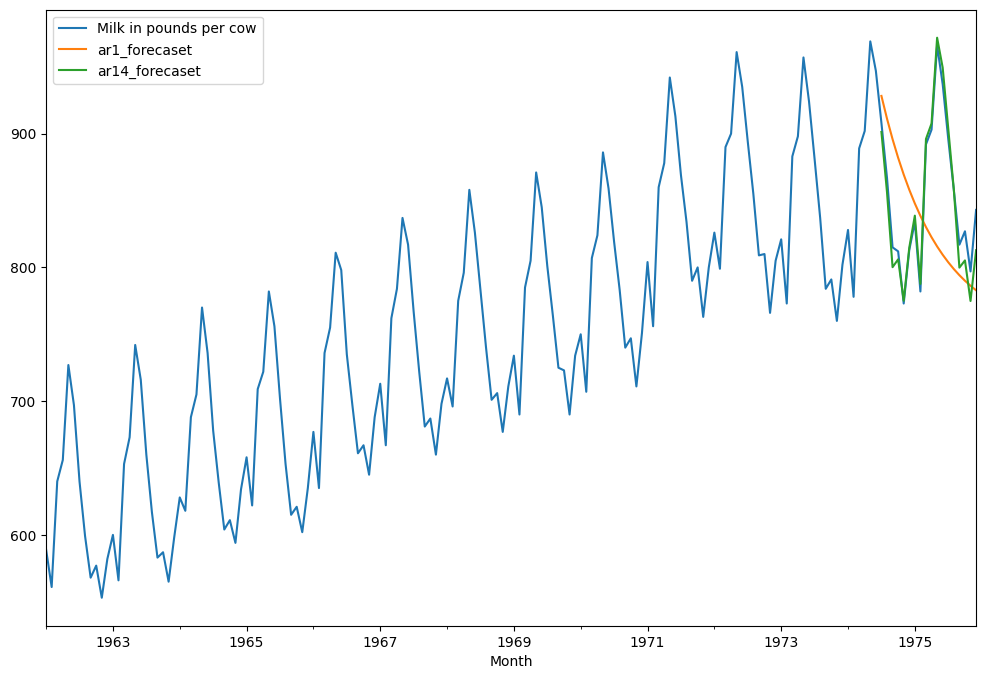

In [82]:
data['ar1_forecaset'] = results_ar.predict(start=150, end=168, dynamic=True)
data['ar14_forecaset'] = results_14.predict(start=150, end=168, dynamic=True)
data[['Milk in pounds per cow','ar1_forecaset','ar14_forecaset']].plot(figsize= (12,8))

## **Fitting an MA Model**

Moving Average (MA) Model:
The Moving Average (MA) model is a linear regression model that uses past forecast errors as predictors for future values.
Application:
MA models are effective for modeling short-term dependencies in the data and capturing sudden changes or shocks. They are used in finance for volatility modeling, in signal processing for noise reduction, and in engineering for quality control.

**r = c + theta.epsilon(t-1) + epsilon(t)**

In [84]:
data

,Milk in pounds per cow,ar1_forecaset,ar14_forecaset
Month,,,
1962-01-01,589.0,NaN,NaN
1962-02-01,561.0,NaN,NaN
1962-03-01,640.0,NaN,NaN
1962-04-01,656.0,NaN,NaN
1962-05-01,727.0,NaN,NaN
...,...,...,...
1975-08-01,858.0,798.769220,858.218552
1975-09-01,817.0,794.177643,799.844000
1975-10-01,827.0,790.025545,805.215627


In [85]:
# Fitting a simple ma model

results_ma1 = ARIMA(data['Milk in pounds per cow'],order=(0,0,1)).fit()
results_ma1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Milk in pounds per cow   No. Observations:                  168
Model:                     ARIMA(0, 0, 1)   Log Likelihood                -945.845
Date:                    Thu, 14 Mar 2024   AIC                           1897.689
Time:                            18:44:04   BIC                           1907.061
Sample:                        01-01-1962   HQIC                          1901.493
                             - 12-01-1975                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        754.7361     10.342     72.979      0.000     734.467     775.006
ma.L1          0.7676      0.069     11.082      0.000       0.632       0.903
sigma2      4522.7716    546.483      8.276      0.000    3451.685    5593.858
===================================================================================
Ljung-Box (L1) (Q):                  36.06   Jarque-Bera (JB):                 5.34
Prob(Q):                              0.00   Prob(JB):                         0.07
Heteroskedasticity (H):               1.03   Skew:                             0.43
Prob(H) (two-sided):                  0.92   Kurtosis:                         2.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [87]:
results_ma7 = ARIMA(data['Milk in pounds per cow'],order=(0,0,7)).fit()
results_ma7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Milk in pounds per cow   No. Observations:                  168
Model:                     ARIMA(0, 0, 7)   Log Likelihood                -831.794
Date:                    Thu, 14 Mar 2024   AIC                           1681.589
Time:                            18:48:34   BIC                           1709.704
Sample:                        01-01-1962   HQIC                          1692.999
                             - 12-01-1975                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        754.6999     25.351     29.770      0.000     705.013     804.387
ma.L1          1.1237     21.212      0.053      0.958     -40.451      42.698
ma.L2          1.4553     61.078      0.024      0.981    -118.255     121.166
ma.L3          1.1095     46.224      0.024      0.981     -89.489      91.708
ma.L4          1.2701     45.745      0.028      0.978     -88.388      90.928
ma.L5          1.3231     70.035      0.019      0.985    -135.944     138.590
ma.L6          1.2352     87.612      0.014      0.989    -170.481     172.952
ma.L7          0.8018     53.190      0.015      0.988    -103.449     105.053
sigma2      1035.9213   6.87e+04      0.015      0.988   -1.34e+05    1.36e+05
===================================================================================
Ljung-Box (L1) (Q):                   2.31   Jarque-Bera (JB):                 5.62
Prob(Q):                              0.13   Prob(JB):                         0.06
Heteroskedasticity (H):               1.03   Skew:                             0.43
Prob(H) (two-sided):                  0.90   Kurtosis:                         3.23
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [89]:
results_ma14 = ARIMA(data['Milk in pounds per cow'],order=(0,0,14)).fit()
results_ma14.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 SARIMAX Results                                  
==================================================================================
Dep. Variable:     Milk in pounds per cow   No. Observations:                  168
Model:                    ARIMA(0, 0, 14)   Log Likelihood                -799.032
Date:                    Thu, 14 Mar 2024   AIC                           1630.065
Time:                            18:49:55   BIC                           1680.048
Sample:                        01-01-1962   HQIC                          1650.351
                             - 12-01-1975                                         
Covariance Type:                      opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        754.7040     16.785     44.962      0.000     721.805     787.603
ma.L1          0.8331   2403.742      0.000      1.000   -4710.414    4712.080
ma.L2          1.2292   2450.289      0.001      1.000   -4801.249    4803.707
ma.L3          0.7373   3326.382      0.000      1.000   -6518.851    6520.326
ma.L4          0.2886   4951.617   5.83e-05      1.000   -9704.702    9705.280
ma.L5          0.2298   1108.336      0.000      1.000   -2172.070    2172.529
ma.L6          0.0790   5040.782   1.57e-05      1.000   -9879.672    9879.830
ma.L7          0.0823    842.935   9.76e-05      1.000   -1652.040    1652.205
ma.L8          0.2875   4353.162    6.6e-05      1.000   -8531.754    8532.329
ma.L9          0.5204   2035.262      0.000      1.000   -3988.520    3989.561
ma.L10         0.4742   3829.629      0.000      1.000   -7505.461    7506.409
ma.L11         0.7122   3219.955      0.000      1.000   -6310.284    6311.708
ma.L12         1.0777   2023.476      0.001      1.000   -3964.863    3967.018
ma.L13         0.6658   2206.493      0.000      1.000   -4323.981    4325.313
ma.L14         0.9179      0.130      7.057      0.000       0.663       1.173
sigma2       634.2759     20.102     31.554      0.000     594.878     673.674
===================================================================================
Ljung-Box (L1) (Q):                   2.85   Jarque-Bera (JB):                 0.09
Prob(Q):                              0.09   Prob(JB):                         0.96
Heteroskedasticity (H):               1.07   Skew:                            -0.06
Prob(H) (two-sided):                  0.79   Kurtosis:                         2.97
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.07e+22. Standard errors may be unstable.
"""

### **Fitting a More Complex Model**

In [90]:
import statsmodels.api as sm

In [91]:
def check_adf(time_series):
    test_result = sts.adfuller(time_series)
    print('ADF Test:')
    labels = ['ADF Statistic', 'p-value', 'No. of Lags Used', 'Number of Observations Used']
    for value, label in zip(test_result, labels):
        print(label + ': ' + str(value))
    if test_result[1] <= 0.05:
        print("Reject null hypothesis and data is stationary")
    else:
        print("Fail to reject H0 and data is non-stationary")

**Addressing the Trend in our time series**

In [ ]:
# Address the seasonilty in our data

In [ ]:
# Differencing

In [92]:
data.head()

,Milk in pounds per cow,ar1_forecaset,ar14_forecaset
Month,,,
1962-01-01,589.0,NaN,NaN
1962-02-01,561.0,NaN,NaN
1962-03-01,640.0,NaN,NaN
1962-04-01,656.0,NaN,NaN
1962-05-01,727.0,NaN,NaN


In [ ]:
data['Milk in pounds per cow'].shift(1)

Month
1962-01-01      NaN
1962-02-01    589.0
1962-03-01    561.0
1962-04-01    640.0
1962-05-01    656.0
              ...  
1975-08-01    896.0
1975-09-01    858.0
1975-10-01    817.0
1975-11-01    827.0
1975-12-01    797.0
Name: Milk in pounds per cow, Length: 168, dtype: float64

In [93]:
data['differenced'] = data['Milk in pounds per cow'] - data['Milk in pounds per cow'].shift(1)
data['differenced']

Month
1962-01-01     NaN
1962-02-01   -28.0
1962-03-01    79.0
1962-04-01    16.0
1962-05-01    71.0
              ... 
1975-08-01   -38.0
1975-09-01   -41.0
1975-10-01    10.0
1975-11-01   -30.0
1975-12-01    46.0
Name: differenced, Length: 168, dtype: float64

In [95]:
adf_results = sts.adfuller(data['differenced'].dropna())
adf_statistic = adf_results[0]
p_value = adf_results[1]
usedlag = adf_results[2]
nobs = adf_results[3]
critical_values = adf_results[4]
icbest = adf_results[5]
print('ADF Statistic:', adf_statistic)
print('p-value:', p_value)
print('Number of Lags Used:', usedlag)
print('Number of Observations Used:', nobs)
print('Critical Values:')
for key, value in critical_values.items():
    print(f'\t{key}: {value}')

ADF Statistic: -3.0549955586530992
p-value: 0.03006800400178324
Number of Lags Used: 14
Number of Observations Used: 152
Critical Values:
	1%: -3.474120870218417
	5%: -2.880749791423677
	10%: -2.5770126333102494


In [94]:
check_adf(data['differenced'].dropna())

ADF Test:
ADF Statistic: -3.0549955586530992
p-value: 0.03006800400178324
No. of Lags Used: 14
Number of Observations Used: 152
Reject null hypothesis and data is stationary


The data is now stationary after differencing it once.

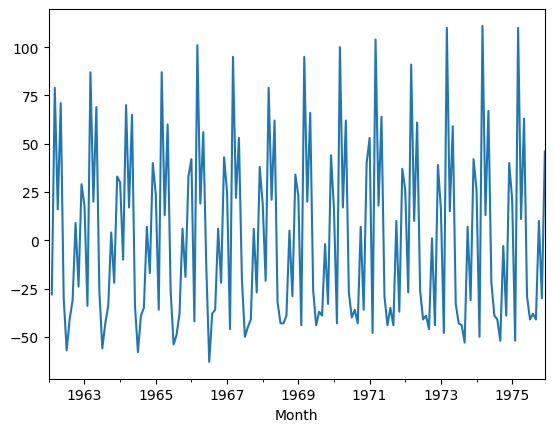

In [96]:
data['differenced'].plot()
plt.show()

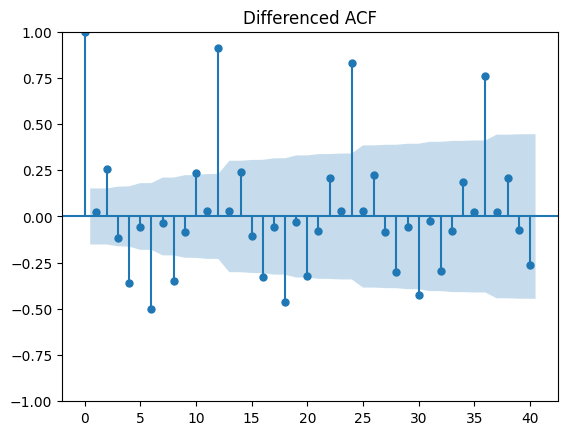

In [97]:
sgt.plot_acf(data['differenced'].dropna(),lags=40)
plt.title('Differenced ACF')
plt.show()

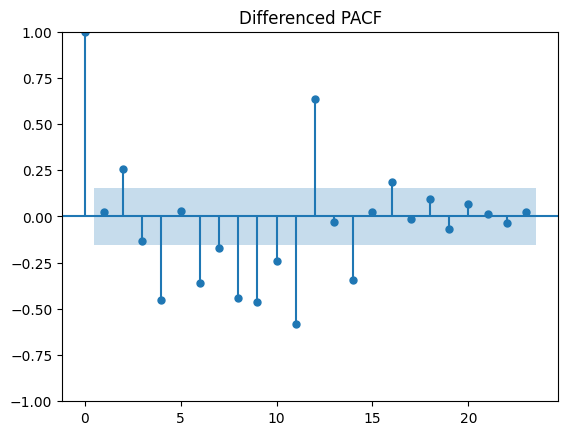

In [98]:
sgt.plot_pacf(data['differenced'].dropna())
plt.title('Differenced PACF')
plt.show()

In [99]:
model = sm.tsa.statespace.SARIMAX(data['Milk in pounds per cow'],order=(0,1,0), seasonal_order=(1,1,1,12))
result_1 = model.fit()
print (result_1.summary())

                                      SARIMAX Results                                       
Dep. Variable:               Milk in pounds per cow   No. Observations:                  168
Model:             SARIMAX(0, 1, 0)x(1, 1, [1], 12)   Log Likelihood                -534.065
Date:                              Thu, 14 Mar 2024   AIC                           1074.131
Time:                                      19:01:39   BIC                           1083.261
Sample:                                  01-01-1962   HQIC                          1077.839
                                       - 12-01-1975                                         
Covariance Type:                                opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.S.L12      -0.0449      0.106     -0.422      0.673      -0.253       0.163
ma.S.L12      -0.58

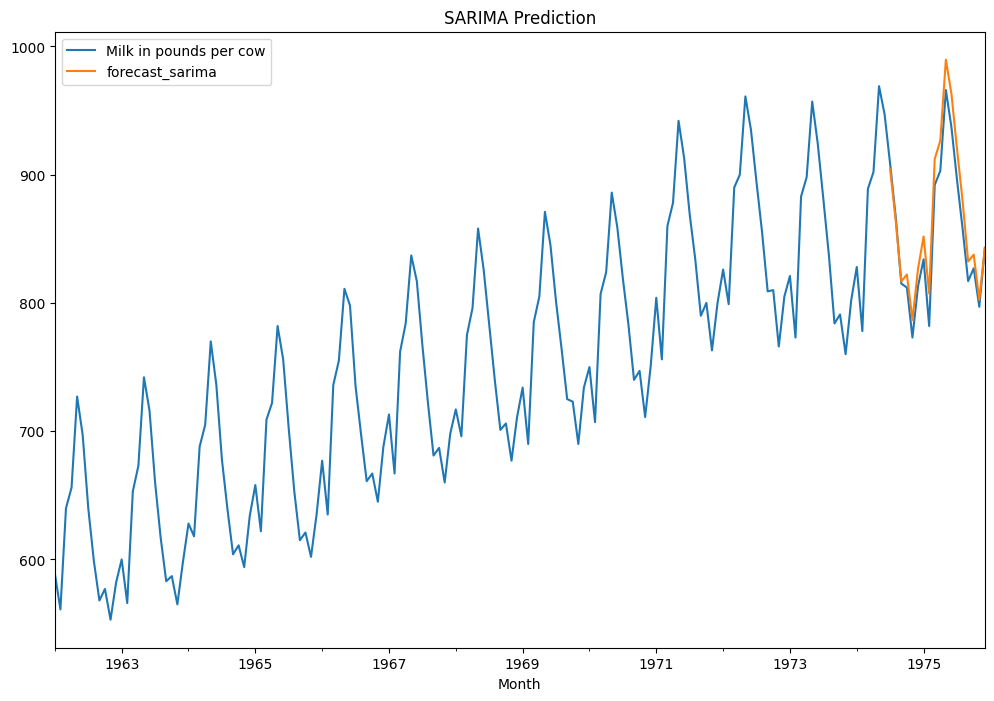

In [100]:
data['forecast_sarima'] = result_1.predict(start = 150, end= 168, dynamic= True)
data[['Milk in pounds per cow','forecast_sarima']].plot(figsize= (12,8))
plt.title('SARIMA Prediction')
plt.show()